**Import Necessary Libraries**

In [1]:
# !pip install --upgrade treebank
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Embedding, GaussianNoise, SimpleRNN
import matplotlib.pyplot as plt 
import string
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import sys

**Input Data and Preprocessing**

In [4]:
train_text = open('ptb.train.txt', 'r').read()
val_text = open('ptb.valid.txt', 'r').read()
len(val_text)
len(train_text)

5101618

In [5]:
def preprocess_data(data):
  data=data.lower()
  tokens = word_tokenize(data)
  temp_data = [x for x in tokens if not x in {'>','<','\n','unk'}]
  temp_char=" "
  processed_data=temp_char.join(temp_data)
  return processed_data

In [6]:
final_train_text=preprocess_data(train_text[:250000])
final_val_text=preprocess_data(val_text)

In [7]:
chars=sorted(list(set(final_train_text+final_val_text)))

In [8]:
#char-int and int-char mapping
char_to_int={char:i for i,char in enumerate(chars)}
int_to_char={i:char for i,char in enumerate(chars)}  

**Create Input-Output lists**

In [9]:
window_length=100

In [10]:
def create_io(data_final,sw):
  X1=[]
  Y1=[]
  sliding_window=sw
  n=len(data_final)-sliding_window
  for i in range(0,n,1):
      input_seq = data_final[i:i+sliding_window]
      output_seq = data_final[i+sliding_window]
      X1.append([char_to_int[char] for char in input_seq])
      Y1.append(char_to_int[output_seq])
  return X1,Y1

In [11]:
X_train,Y_train=create_io(final_train_text,window_length)

In [12]:
X_val,Y_val=create_io(final_val_text,window_length)

In [13]:
X_t = np.reshape(X_train, (len(X_train), window_length, 1))/float(len(chars))
y_t = np_utils.to_categorical(Y_train)

In [14]:
X_v = np.reshape(X_val, (len(X_val), window_length, 1))/float(len(chars))
y_v = np_utils.to_categorical(Y_val)

**Single Layer RNN**

In [ ]:
model1 = Sequential()
model1.add(SimpleRNN(128, input_shape=(X_t.shape[1], X_t.shape[2])))
model1.add(Dense(y_t.shape[1], activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(X_t, y_t, epochs=10,validation_data=(X_v,y_v),batch_size=128)

Epoch 1/10
1805/1805 [==============================] - 206s 114ms/step - loss: 2.7407 - accuracy: 0.2182 - val_loss: 2.7115 - val_accuracy: 0.2296
Epoch 2/10
1805/1805 [==============================] - 198s 110ms/step - loss: 2.6732 - accuracy: 0.2323 - val_loss: 2.6771 - val_accuracy: 0.2286
Epoch 3/10
1805/1805 [==============================] - 195s 108ms/step - loss: 2.6269 - accuracy: 0.2400 - val_loss: 2.6069 - val_accuracy: 0.2414
Epoch 4/10
1805/1805 [==============================] - 195s 108ms/step - loss: 2.5877 - accuracy: 0.2439 - val_loss: 2.5732 - val_accuracy: 0.2477
Epoch 5/10
1805/1805 [==============================] - 200s 111ms/step - loss: 2.5572 - accuracy: 0.2483 - val_loss: 2.5571 - val_accuracy: 0.2528
Epoch 6/10
1805/1805 [==============================] - 200s 111ms/step - loss: 2.5330 - accuracy: 0.2547 - val_loss: 2.5263 - val_accuracy: 0.2584
Epoch 7/10
1805/1805 [==============================] - 197s 109ms/step - loss: 2.5102 - accuracy: 0.2602 - val_

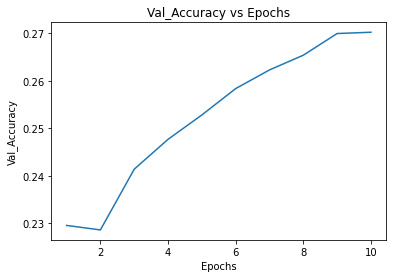

In [ ]:
accuracy = history1.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy)
plt.title('Val_Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Val_Accuracy')
plt.show()

**Single Layer LSTM Model**

In [ ]:
model2 = Sequential()
model2.add(LSTM(128, input_shape=(X_t.shape[1], X_t.shape[2])))
model2.add(Dense(y_t.shape[1], activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(X_t, y_t, epochs=10,validation_data=(X_v,y_v),batch_size=128)

Epoch 1/10
1805/1805 [==============================] - 767s 424ms/step - loss: 2.8217 - accuracy: 0.1975 - val_loss: 2.7368 - val_accuracy: 0.2158
Epoch 2/10
1805/1805 [==============================] - 769s 426ms/step - loss: 2.7031 - accuracy: 0.2259 - val_loss: 2.6699 - val_accuracy: 0.2351
Epoch 3/10
1805/1805 [==============================] - 735s 407ms/step - loss: 2.6479 - accuracy: 0.2356 - val_loss: 2.6248 - val_accuracy: 0.2396
Epoch 4/10
1805/1805 [==============================] - 717s 397ms/step - loss: 2.6104 - accuracy: 0.2403 - val_loss: 2.5907 - val_accuracy: 0.2467
Epoch 5/10
1805/1805 [==============================] - 722s 400ms/step - loss: 2.5828 - accuracy: 0.2450 - val_loss: 2.5736 - val_accuracy: 0.2488
Epoch 6/10
1805/1805 [==============================] - 720s 399ms/step - loss: 2.5612 - accuracy: 0.2485 - val_loss: 2.5511 - val_accuracy: 0.2557
Epoch 7/10
1805/1805 [==============================] - 724s 401ms/step - loss: 2.5424 - accuracy: 0.2530 - val_

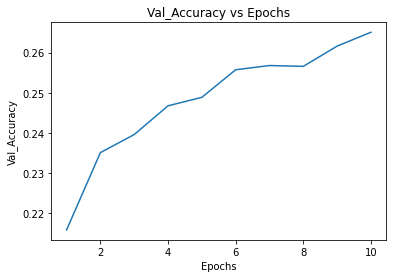

In [ ]:
accuracy = history2.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy)
plt.title('Val_Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Val_Accuracy')
plt.show()

**Single Layer LSTM with Gaussian Noise**


In [ ]:
model3 = Sequential()
model3.add(LSTM(128, input_shape=(X_t.shape[1], X_t.shape[2])))
model3.add(GaussianNoise(0.075))
model3.add(Dense(y_t.shape[1], activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(X_t, y_t, epochs=10,validation_data=(X_v,y_v),batch_size=128)

Epoch 1/10
1805/1805 [==============================] - 736s 407ms/step - loss: 2.8381 - accuracy: 0.1927 - val_loss: 2.7558 - val_accuracy: 0.2062
Epoch 2/10
1805/1805 [==============================] - 727s 403ms/step - loss: 2.7225 - accuracy: 0.2198 - val_loss: 2.6931 - val_accuracy: 0.2285
Epoch 3/10
1805/1805 [==============================] - 728s 403ms/step - loss: 2.6693 - accuracy: 0.2301 - val_loss: 2.6381 - val_accuracy: 0.2378
Epoch 4/10
1805/1805 [==============================] - 726s 402ms/step - loss: 2.6329 - accuracy: 0.2353 - val_loss: 2.6104 - val_accuracy: 0.2414
Epoch 5/10
1805/1805 [==============================] - 717s 397ms/step - loss: 2.6079 - accuracy: 0.2399 - val_loss: 2.5833 - val_accuracy: 0.2461
Epoch 6/10
1805/1805 [==============================] - 717s 397ms/step - loss: 2.5898 - accuracy: 0.2425 - val_loss: 2.5686 - val_accuracy: 0.2483
Epoch 7/10
1805/1805 [==============================] - 717s 397ms/step - loss: 2.5738 - accuracy: 0.2446 - val_

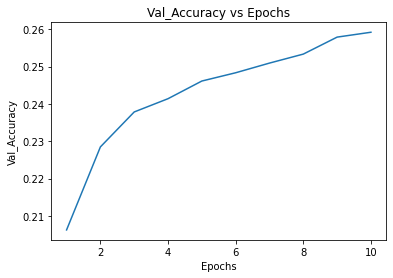

In [ ]:
accuracy = history3.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy)
plt.title('Val_Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Val_Accuracy')
plt.show()

**Multi Layer LSTM Model**

In [16]:
model4 = Sequential()
model4.add(LSTM(128, input_shape=(X_t.shape[1], X_t.shape[2]), return_sequences = True))
model4.add(LSTM(128))
model4.add(Dense(y_t.shape[1], activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [17]:
history4 = model4.fit(X_t, y_t, epochs=10,validation_data=(X_v,y_v),batch_size=128)

Epoch 1/10
1805/1805 [==============================] - 140s 73ms/step - loss: 2.7727 - accuracy: 0.2078 - val_loss: 2.6372 - val_accuracy: 0.2354
Epoch 2/10
1805/1805 [==============================] - 128s 71ms/step - loss: 2.5791 - accuracy: 0.2454 - val_loss: 2.5196 - val_accuracy: 0.2623
Epoch 3/10
1805/1805 [==============================] - 128s 71ms/step - loss: 2.4710 - accuracy: 0.2729 - val_loss: 2.4272 - val_accuracy: 0.2916
Epoch 4/10
1805/1805 [==============================] - 163s 90ms/step - loss: 2.3704 - accuracy: 0.3048 - val_loss: 2.3398 - val_accuracy: 0.3187
Epoch 5/10
1805/1805 [==============================] - 127s 71ms/step - loss: 2.2815 - accuracy: 0.3322 - val_loss: 2.2736 - val_accuracy: 0.3401
Epoch 6/10
1805/1805 [==============================] - 163s 91ms/step - loss: 2.2047 - accuracy: 0.3558 - val_loss: 2.2187 - val_accuracy: 0.3553
Epoch 7/10
1805/1805 [==============================] - 164s 91ms/step - loss: 2.1406 - accuracy: 0.3762 - val_loss: 2

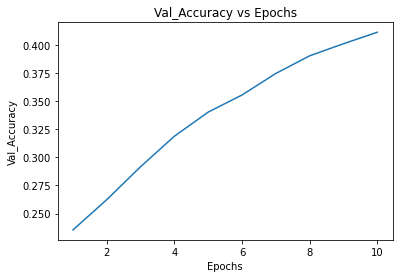

In [18]:
accuracy = history4.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy)
plt.title('Val_Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Val_Accuracy')
plt.show()

**Predictions**

In [15]:
def Predict(seed_text,num_of_char,model):
  x_test=[]
  predicted_string=""
  seed_text=preprocess_data(seed_text)
  seed_text=[char_to_int[char] for char in seed_text]
  for i in range(num_of_char):
    x = np.reshape(seed_text, (1, len(seed_text), 1))
    x = x / float(len(chars))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    predicted_string+= result
    seed_text.append(index)
    seed_text = seed_text[1:len(seed_text)]
  return predicted_string


In [ ]:
print("Single Layer RNN Model")
ans1=Predict(final_train_text[1000:1101],50,model1)
print("Input: ",final_train_text[1000:1101])
print("Output: ",ans1)

Single Layer RNN Model
Input:   journal of medicine a forum likely to bring new attention to the problem a said this is an old story
Output:  ere the see cnd the see see see see see see see se


In [ ]:
print("Single Layer LSTM Model")
ans2=Predict(final_train_text[1000:1101],50,model2)
print("Input: ",final_train_text[1000:1101])
print("Output: ",ans2)

Single Layer LSTM Model
Input:   journal of medicine a forum likely to bring new attention to the problem a said this is an old story
Output:   to the sese the sese the sese the sese the sese t


In [ ]:
print("Single Layer LSTM Model with weight noise")
ans3=Predict(final_train_text[1000:1101],50,model3)
print("Input: ",final_train_text[1000:1101])
print("Output: ",ans3)

Single Layer LSTM Model with weight noise
Input:   journal of medicine a forum likely to bring new attention to the problem a said this is an old story
Output:   and the cor the cor the cor the cor the cor the c


In [19]:
print("Multi Layer LSTM Model")
ans4=Predict(final_train_text[1000:1101],50,model4)
print("Input: ",final_train_text[1000:1101])
print("Output: ",ans4)

Multi Layer LSTM Model
Input:   journal of medicine a forum likely to bring new attention to the problem a said this is an old story
Output:  ing a seareie and the company said the company sai
